# Imports

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
import sklearn
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Getting Dataframe from Data

In [3]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Prepared_for_ML_Data.csv'
player_balls = pd.read_csv(path)

In [4]:
player_balls.head()

,Unnamed: 0,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0,0.0,0.0,1.0,23,13,70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.0,0.0,1.0,23,15,141,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,0.0,0.0,1.0,23,15,144,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,0.0,0.0,1.0,23,15,147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,4,0.0,0.0,1.0,23,15,148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [5]:
# Removing the Unnamed: 0 column
player_balls.drop(['Unnamed: 0'], axis = 1, inplace = True)
player_balls.head()

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,23,13,70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,1.0,23,15,141,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,23,15,144,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,23,15,147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,23,15,148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Data Exploration

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

import seaborn as sb
sb.set_style('whitegrid')

<AxesSubplot:>

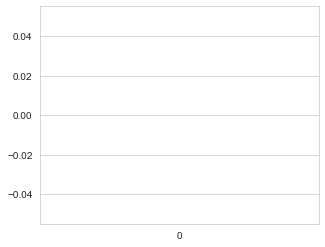

In [7]:
sb.barplot()

In [8]:
wicket_balls = player_balls[player_balls['Out'] == 1]
wicket_balls.index = np.arange(0, len(wicket_balls))
wicket_balls.head()

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,23,21,51,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.0,0.0,1.0,47,3,147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.0,1.0,47,23,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,3,13,90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,1.0,3,10,129,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


<BarContainer object of 3 artists>

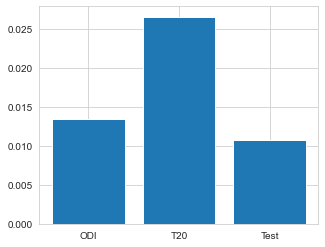

In [9]:
# Which format does the player get out the most in (depending on proportions --> wicket balls in format / total balls in format)
formats = ['ODI', 'T20', 'Test']
counts = [len(wicket_balls[wicket_balls['ODI'] == 1]) / len(player_balls[player_balls['ODI'] == 1]), len(wicket_balls[wicket_balls['T20'] == 1]) / len(player_balls[player_balls['T20'] == 1]), len(wicket_balls[wicket_balls['Test'] == 1]) / len(player_balls[player_balls['Test'] == 1])]
plt.bar(formats, counts)

# We can see that Virat Kohli gets out the fastest in T20, this might also be because there are not that many balls to play in T20s

<BarContainer object of 56 artists>

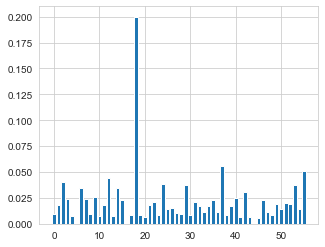

In [10]:
# Does any ground get the player out a large number of times
grounds = player_balls['Game Location'].unique()
counts = []

for loc in grounds:
    counts.append(len(wicket_balls[wicket_balls['Game Location'] == loc]) / len(player_balls[player_balls['Game Location'] == loc]))
    
plt.bar(grounds, counts)

# We can see that the 18th index ground is bad for Virat Kohli
# But this might also be because he has played there very few times and hasn't been able to score well any of those times

<BarContainer object of 24 artists>

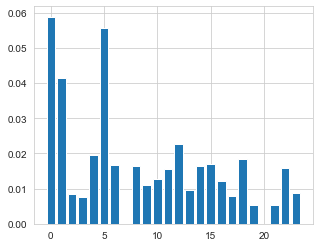

In [11]:
# Does any bowling style get the player out a large number of times
styles = player_balls['Bowling Style'].unique()
counts = []

for s in styles:
    counts.append(len(wicket_balls[wicket_balls['Bowling Style'] == s]) / len(player_balls[player_balls['Bowling Style'] == s]))
    
plt.bar(styles, counts)

# Graph shows that Virat Kohli gets out much more to pacers compared to spinners

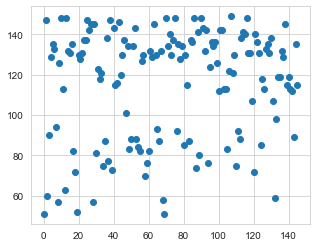

In [12]:
# How speed affects if Virat Kohli gets out or not
plt.scatter(wicket_balls.index, wicket_balls['Speed'])

# Doesn't look like there is a relationship
# But he has gotten out more to faster balls than slower balls

<BarContainer object of 6 artists>

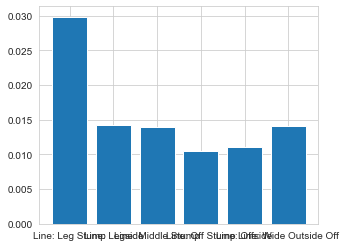

In [13]:
# Which Line Does Virat Kohli Get out the most
lines = ['Line: Leg Stump', 'Line: Legside', 'Line: Middle Stump', 'Line: Off Stump', 'Line: Offside', 'Line: Wide Outside Off']
counts = []

for l in lines:
    counts.append(len(wicket_balls[wicket_balls[l] == 1]) / len(player_balls[player_balls[l] == 1]))
    
plt.bar(lines, counts)

# Seems like Kohli gets out a lot on legside balls

<BarContainer object of 4 artists>

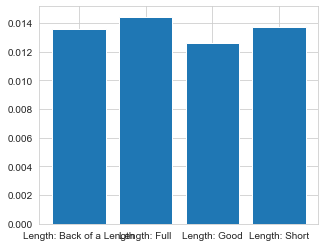

In [14]:
# Which Length Does Virat Kohli Get out the most
lengths = ['Length: Back of a Length', 'Length: Full', 'Length: Good', 'Length: Short']
counts = []

for l in lengths:
    counts.append(len(wicket_balls[wicket_balls[l] == 1]) / len(player_balls[player_balls[l] == 1]))
    
plt.bar(lengths, counts)

# Seems like Kohli gets out more often on full balls

# Logistic Regression

### Breaking Data into Training and Testing

In [28]:
not_out_balls = player_balls[player_balls['Out'] == 0].sample(n = 146)
revised_df = pd.concat([wicket_balls, not_out_balls])
revised_df.head()

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,23,21,51,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.0,0.0,1.0,47,3,147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.0,1.0,47,23,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,3,13,90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,1.0,3,10,129,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [29]:
# Splitting the data randomly between the 4 variables
# Need to drop Out column from X_train and X_test since that's what we are going to predict
# Test size is 0.2 because we want the testing data to be 20% of the original data
X_train, X_test, Y_train, Y_test = train_test_split(revised_df.drop(['Out'], axis = 1), revised_df['Out'], test_size = 0.20)

In [30]:
X_train.head()

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
5776,0.0,0.0,1.0,4,6,82,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75,0.0,0.0,1.0,25,9,148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
906,0.0,0.0,1.0,17,16,127,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
127,1.0,0.0,0.0,51,10,133,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
135,0.0,1.0,0.0,18,18,119,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
Y_train.head()

5776    0
75      1
906     0
127     1
135     1
Name: Out, dtype: int64

In [32]:
print(len(X_train))
print(len(X_test))

233
59


### Deploying the Model

In [33]:
# Training the Model
Log_Reg = LogisticRegression(solver = 'liblinear')
Log_Reg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [34]:
# Feeding new data to our trained model
Y_prediction = Log_Reg.predict(X_test)

# Model Evaluation

### Classification Report without Cross-Validation

In [35]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64        28
           1       0.67      0.39      0.49        31

    accuracy                           0.58        59
   macro avg       0.60      0.59      0.56        59
weighted avg       0.60      0.58      0.56        59



### K-Fold Cross-Validation & Confusion Matrices

In [48]:
# The matrix tells us that 73 are the correct number of predictions for 0 and 45 are the incorrect predictions
# We made 57 correct predictions for 1 and 58 incorrect predictions for 1
Y_train_pred = cross_val_predict(Log_Reg, X_train, Y_train, cv = 5)
train_accuracy = metrics.accuracy_score(Y_train, Log_Reg.predict(X_train))
test_accuracy = metrics.accuracy_score(Y_test, Y_prediction)

print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)
confusion_matrix(Y_train, Y_train_pred)

Train Accuracy:  0.6266094420600858
Test Accuracy:  0.576271186440678


array([[73, 45],
       [57, 58]], dtype=int64)

In [38]:
# Precision of the model
precision_score(Y_train, Y_train_pred)

0.5631067961165048

# Making a Test Prediction

In [39]:
player_balls[150:151]

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
150,0.0,0.0,1.0,23,13,93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [40]:
test_ball = np.array([0, 1, 0, 23, 13, 93, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]).reshape(1, -1)
print(Log_Reg.predict(test_ball)) # the prediction
print(Log_Reg.predict_proba(test_ball)) # probability of the prediction being correct (77.8%)

[1]
[[0.38950609 0.61049391]]
